In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/WA_Fn-UseC_-Telco-Customer-Churn.csv"

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [ ]:
# Separate the DataFrame into numeric and non-numeric columns
numeric_columns = df.select_dtypes(include='number').columns
non_numeric_columns = df.select_dtypes(exclude='number').columns

# Check for missing values in the numeric columns
numeric_missing_values = df[numeric_columns].isnull()
numeric_missing_counts = numeric_missing_values.sum()
numeric_missing_percentage = (numeric_missing_counts / len(df)) * 100

# Check for missing values in the non-numeric columns
non_numeric_missing_values = df[non_numeric_columns].isnull()
non_numeric_missing_counts = non_numeric_missing_values.sum()
non_numeric_missing_percentage = (non_numeric_missing_counts / len(df)) * 100

# Display the missing values for numeric columns
print("Numeric Missing Value Counts:")
print(numeric_missing_counts)
print("\nNumeric Missing Value Percentages:")
print(numeric_missing_percentage)

# Display the missing values for non-numeric columns
print("\nNon-Numeric Missing Value Counts:")
print(non_numeric_missing_counts)
print("\nNon-Numeric Missing Value Percentages:")
print(non_numeric_missing_percentage)

Numeric Missing Value Counts:
SeniorCitizen     0
tenure            0
MonthlyCharges    0
dtype: int64

Numeric Missing Value Percentages:
SeniorCitizen     0.0
tenure            0.0
MonthlyCharges    0.0
dtype: float64

Non-Numeric Missing Value Counts:
customerID          0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
Churn               0
dtype: int64

Non-Numeric Missing Value Percentages:
customerID          0.0
gender              0.0
Partner             0.0
Dependents          0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
Streamin

In [ ]:
column_names = df.columns
print("Column Names in the DataFrame:")
print(column_names)

Column Names in the DataFrame:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#Removing 11 rows with missing values identified
df.dropna(inplace = True)

In [ ]:
#To check if missing values have been handled
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

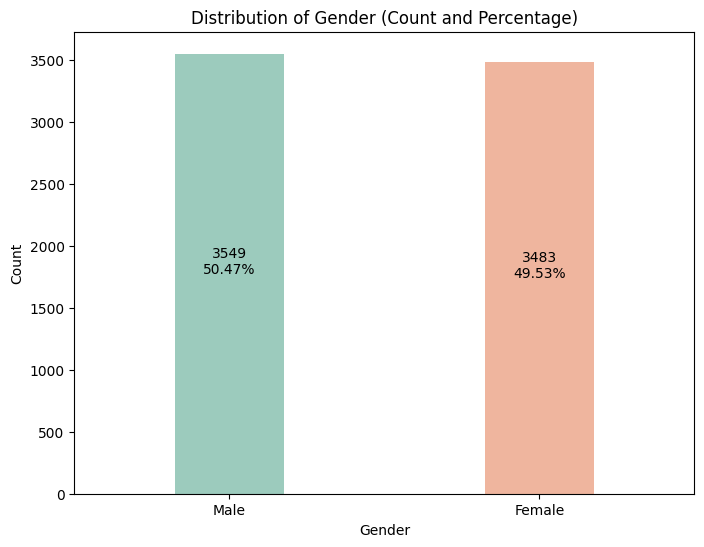

In [ ]:
import seaborn as sns

# Calculate the count and percentage distribution of 'gender' variable
gender_count = df['gender'].value_counts()
gender_percentage = df['gender'].value_counts(normalize=True) * 100

# Define the bar width and reduce bar height
bar_width = 0.35
reduced_height = 0.5  # Adjust this value to reduce the bar height

# Create a count plot for the 'gender' variable with count on top of the bars
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=gender_count.index, y=gender_count, palette='Set2', alpha=0.7, width=bar_width)

# Annotate the bars with both count and percentage values on top
for i, (count, percentage) in enumerate(zip(gender_count, gender_percentage)):
    ax.text(i, count * reduced_height, f'{count}\n{percentage:.2f}%', color='black', ha='center')

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender (Count and Percentage)')

plt.show()

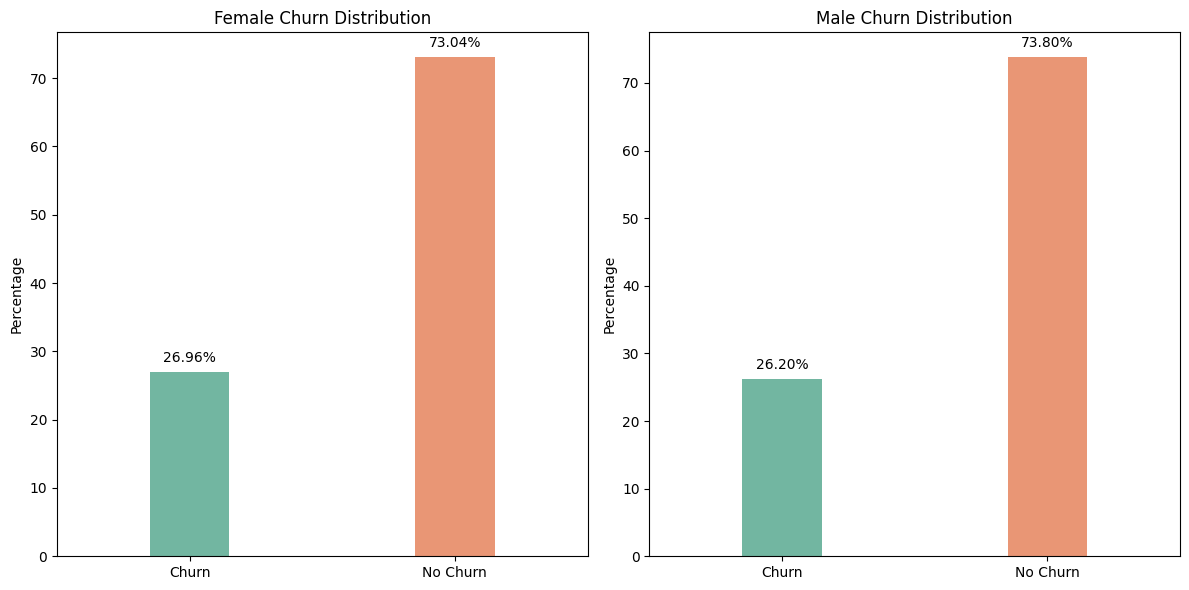

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'gender' and 'Churn' variables
# Filter data for each gender category
female_data = df[df['gender'] == 'Female']
male_data = df[df['gender'] == 'Male']

# Count the occurrences of 'Churn' for each gender category
female_churn_counts = female_data['Churn'].value_counts()
male_churn_counts = male_data['Churn'].value_counts()

# Calculate the percentage distribution for each gender category
female_churn_percentage = female_churn_counts / female_data.shape[0] * 100
male_churn_percentage = male_churn_counts / male_data.shape[0] * 100

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for Female
sns.barplot(x=['Churn', 'No Churn'], y=[female_churn_percentage['Yes'], female_churn_percentage['No']],
            ax=axes[0], palette='Set2', width=0.3)  # Adjust the width parameter
axes[0].set_title('Female Churn Distribution')
axes[0].set_ylabel('Percentage')

# Annotate the bars with percentage values
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot for Male
sns.barplot(x=['Churn', 'No Churn'], y=[male_churn_percentage['Yes'], male_churn_percentage['No']],
            ax=axes[1], palette='Set2', width=0.3)  # Adjust the width parameter
axes[1].set_title('Male Churn Distribution')
axes[1].set_ylabel('Percentage')

# Annotate the bars with percentage values
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

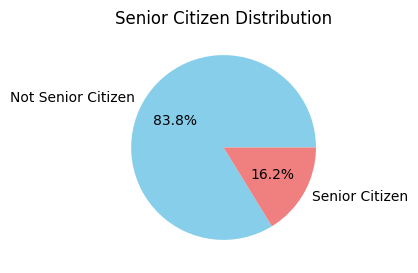

In [ ]:
# Calculate the count of senior citizens
senior_count = df['SeniorCitizen'].value_counts()

# Create a pie chart
plt.figure(figsize=(3, 3))
plt.pie(senior_count, labels=['Not Senior Citizen', 'Senior Citizen'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Senior Citizen Distribution')

plt.show()

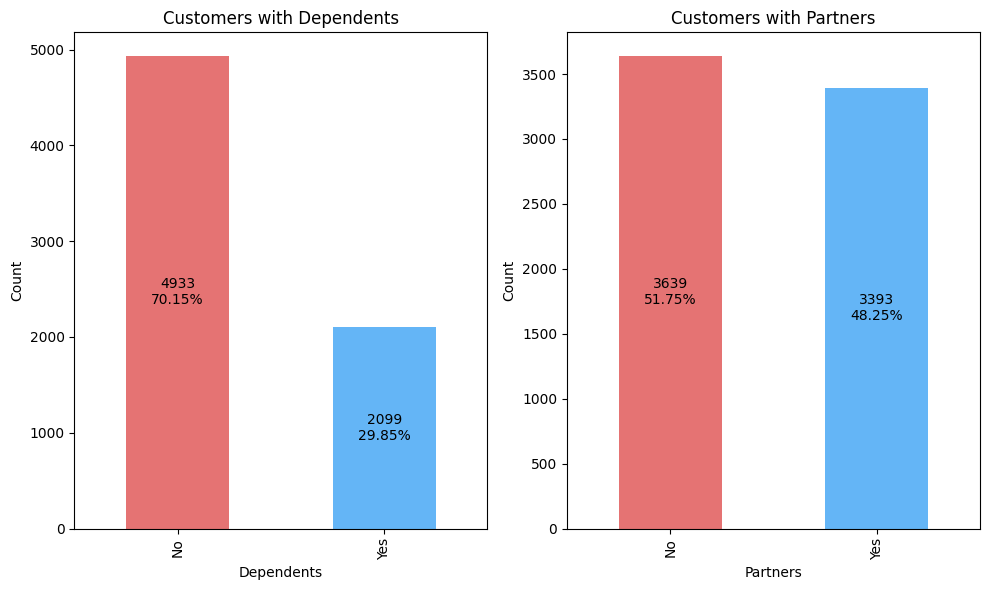

In [ ]:
# Calculate the count and percentage of customers with and without dependents
dependents_counts = df['Dependents'].value_counts()
dependents_percentages = df['Dependents'].value_counts(normalize=True) * 100

# Calculate the count and percentage of customers with and without partners
partners_counts = df['Partner'].value_counts()
partners_percentages = df['Partner'].value_counts(normalize=True) * 100

# Create subplots with two stacked bar plots side by side
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # First subplot for Dependents
dependents_counts.plot(kind='bar', stacked=True, color=['#E57373', '#64B5F6'])
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Customers with Dependents')
for i, (count, percentage) in enumerate(zip(dependents_counts, dependents_percentages)):
    plt.text(i, count*0.5, f'{count}\n{percentage:.2f}%', ha='center', va='center')  # Adjust the vertical alignment here

plt.subplot(1, 2, 2)  # Second subplot for Partners
partners_counts.plot(kind='bar', stacked=True, color=['#E57373', '#64B5F6'])
plt.xlabel('Partners')
plt.ylabel('Count')
plt.title('Customers with Partners')
for i, (count, percentage) in enumerate(zip(partners_counts, partners_percentages)):
    plt.text(i, count*0.5, f'{count}\n{percentage:.2f}%', ha='center', va='center')  # Adjust the vertical alignment here

plt.tight_layout()  # Ensure subplots are pro

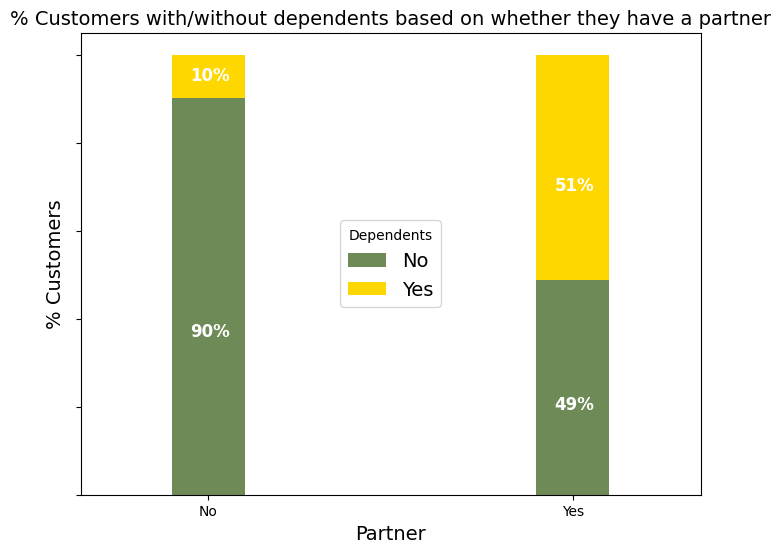

In [ ]:
import matplotlib.ticker as mtick

colors = ['#6E8B57', '#FFD700']
partner_dependents = df.groupby(['Partner', 'Dependents']).size().unstack()

ax = (partner_dependents.T * 100.0 / partner_dependents.T.sum()).T.plot(
    kind='bar',
    width=0.2,
    stacked=True,
    rot=0,
    figsize=(8, 6),
    color=colors
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center', prop={'size': 14}, title='Dependents', fontsize=14)
ax.set_ylabel('% Customers', size=14)
ax.set_title('% Customers with/without dependents based on whether they have a partner', size=14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='white',
                weight='bold',
                size=12)  # Smaller font size for percentage

# Hide the count labels
ax.set_yticklabels([])

plt.show()

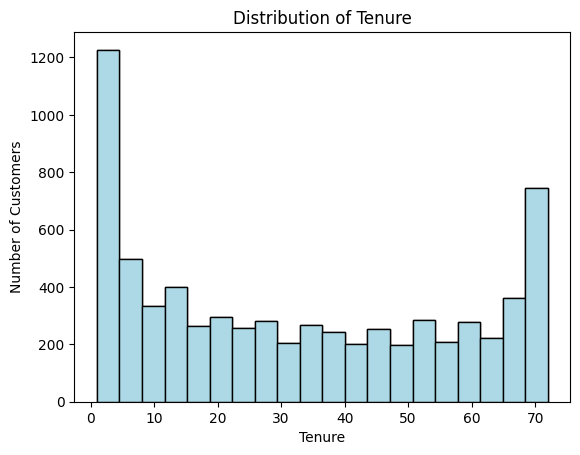

In [ ]:
# Create the histogram
plt.hist(df['tenure'], bins=20, edgecolor='k', color='lightblue')

# Customize the plot
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Distribution of Tenure')

# Calculate the bin counts
n, bins, _ = plt.hist(df['tenure'], bins=20, edgecolor='k', color='lightblue')

# Add labels with counts above the bars
#for count, x in zip(n, bins):
   # plt.text(x, count, str(int(count)), ha='center', va='bottom', fontsize=8)  # Adjust the fontsize

plt.show()

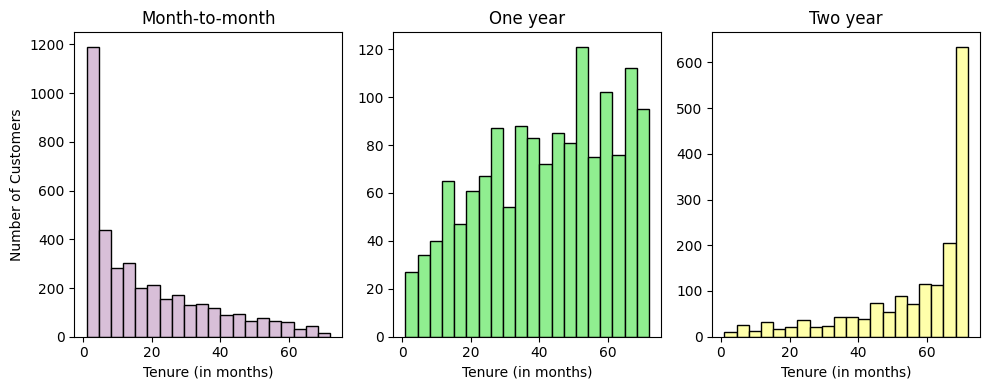

In [ ]:
import matplotlib.pyplot as plt

# Separate the data by contract type
month_to_month = df[df['Contract'] == 'Month-to-month']
one_year = df[df['Contract'] == 'One year']
two_year = df[df['Contract'] == 'Two year']

# Create subplots for each contract type
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Histogram for Month-to-month
axes[0].hist(month_to_month['tenure'], bins=20, edgecolor='k', color='#D8BFD8')
axes[0].set_xlabel('Tenure (in months)')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Month-to-month')

# Histogram for One year
axes[1].hist(one_year['tenure'], bins=20, edgecolor='k', color='#90EE90')
axes[1].set_xlabel('Tenure (in months)')
axes[1].set_title('One year')

# Histogram for Two year
axes[2].hist(two_year['tenure'], bins=20, edgecolor='k', color='#FFFFAA')
axes[2].set_xlabel('Tenure (in months)')
axes[2].set_title('Two year')

plt.tight_layout()
plt.show()

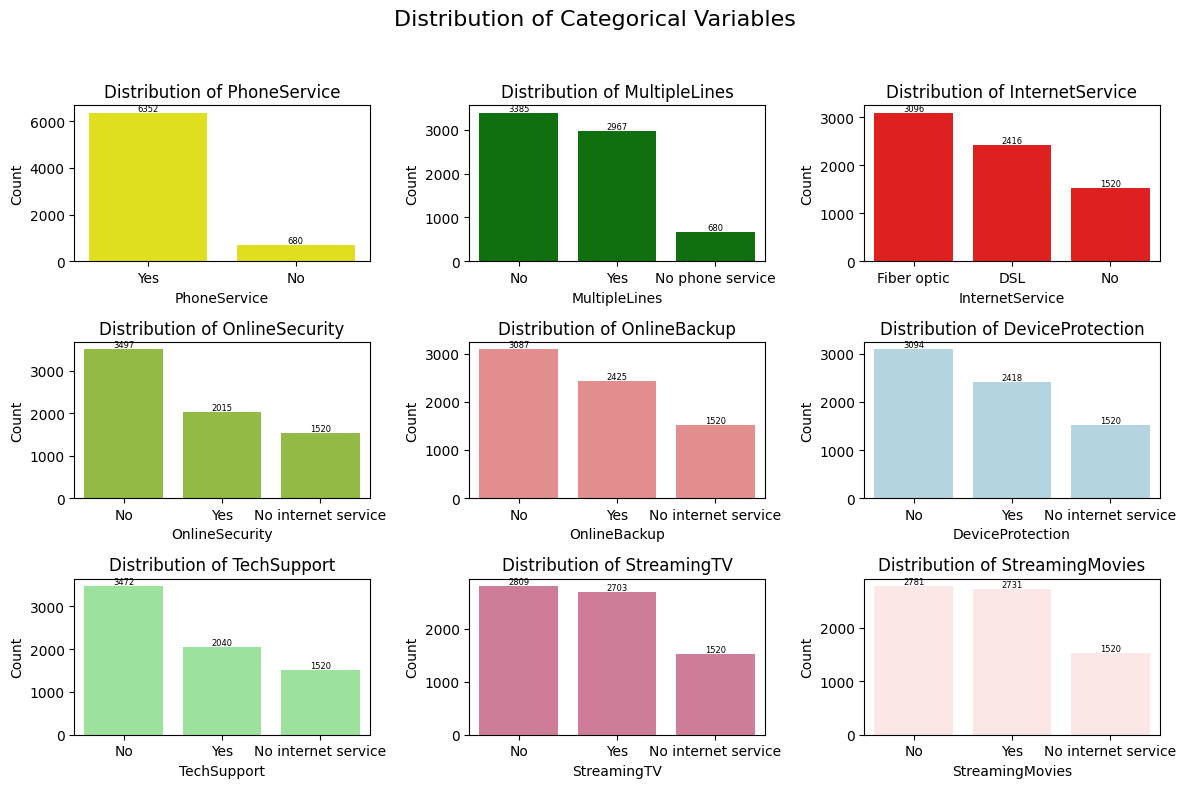

In [ ]:
# Define the variables and colors
variables = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
colors = ['yellow', 'green', 'red', 'yellowgreen', 'lightcoral', 'lightblue', 'lightgreen', 'palevioletred', 'mistyrose']

# Create subplots with adjusted width
fig, axes = plt.subplots(3, 3, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1, 1]})

fig.suptitle('Distribution of Categorical Variables', fontsize=16)

# Loop through variables and corresponding colors
for i, (variable, color) in enumerate(zip(variables, colors)):
    ax = axes[i // 3, i % 3]
    data = df[variable].value_counts().reset_index()
    sns.barplot(data=data, x='index', y=variable, ax=ax, palette=[color])  # Adjust the width using barplot
    ax.set_title(f'Distribution of {variable}', fontsize=12)
    ax.set_xlabel(variable, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x')

    # Add count labels on the center of the bars
    for index, row in data.iterrows():
        ax.annotate(row[variable], xy=(index, row[variable]), ha='center', va='bottom', fontsize=6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# # Create histograms for "TotalCharges" by churn category
# plt.figure(figsize=(10, 6))
# sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, palette='Set2')
# plt.title('Distribution of TotalCharges by Churn')
# plt.xlabel('TotalCharges')
# plt.ylabel('Count')
# plt.show()

In [ ]:
df['Churn'].replace(to_replace='Yes', value=0, inplace=True)
df['Churn'].replace(to_replace='No',  value=1, inplace=True)

In [ ]:
#Remove customer IDs from the data set
df2 = df.drop('customerID', axis=1)

In [ ]:

# # Create dummies for categorical columns
df_final = pd.get_dummies(df2)
df_final.head()


# from sklearn.preprocessing import LabelEncoder

# # Assuming df is your original DataFrame with categorical columns
# # and 'target' is your target variable

# # Create a copy of the DataFrame to avoid modifying the original
# df_final = df2.copy()

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Apply label encoding to each categorical column
# for column in df2.select_dtypes(include=['object']).columns:
#     df_final[column] = label_encoder.fit_transform(df2[column])



,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,1,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


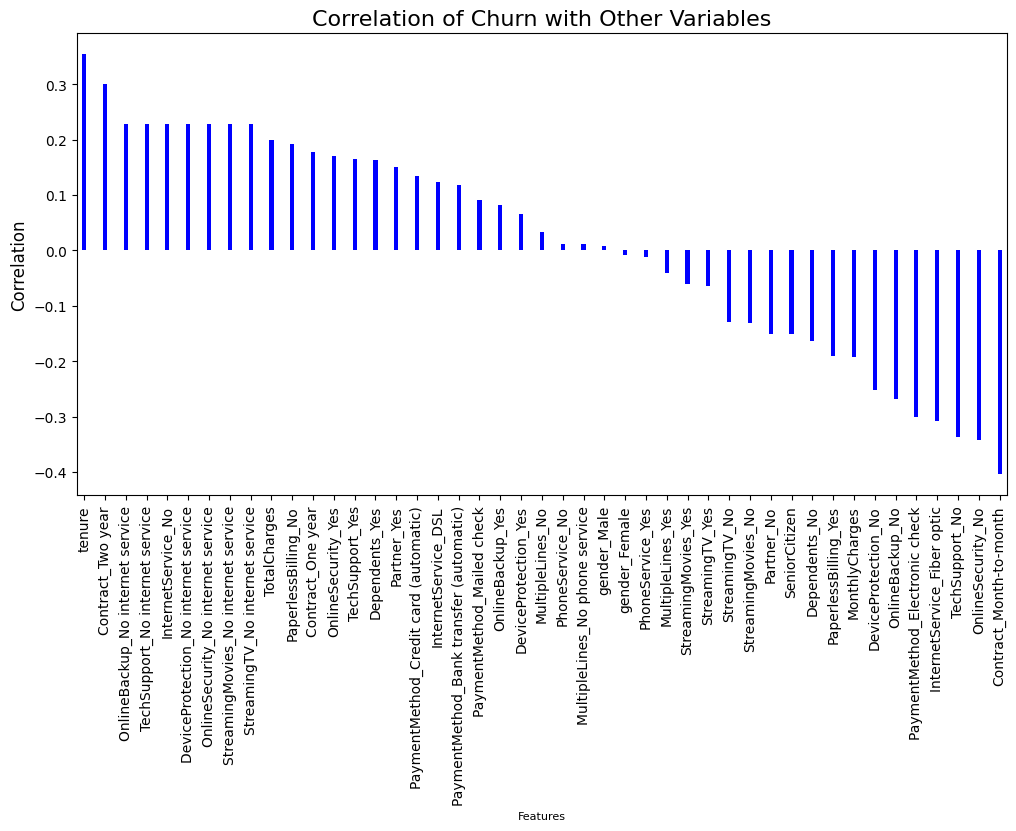

In [ ]:
# Calculate the correlation of 'Churn' with other variables
correlations = df_final.corr()['Churn'].drop('Churn')

# Sort the correlations in descending order
correlations = correlations.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = correlations.plot(kind='bar', color='blue', width=0.2)
ax.set_title('Correlation of Churn with Other Variables', fontsize=16)
ax.set_xlabel('Features', fontsize=8)
ax.set_ylabel('Correlation', fontsize=12)

# Customize the x-axis labels to fit without rotation
ax.set_xticklabels(correlations.index, fontsize=10)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

# First split the data into training (60%) and temporary (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Then split the temporary set into validation (20%) and testing (20%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print("Number of columns in training set:", X_train.shape[1])

# Print the number of columns in the validation set
print("Number of columns in validation set:", X_val.shape[1])

# Print the number of columns in the testing set
print("Number of columns in testing set:", X_test.shape[1])

Number of columns in training set: 45
Number of columns in validation set: 45
Number of columns in testing set: 45


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import EditedNearestNeighbours

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# # Apply ENN to the training data
# enn = EditedNearestNeighbours(sampling_strategy='auto')
# X_train_resampled, y_train_resampled = enn.fit_resample(X_train_scaled, y_train)

In [ ]:
!pip install tensorflow

In [ ]:
import os
# os.environ['PYTHONHASHSEED'] = '0'

import tensorflow as tf
import numpy as np
import random as rn

rn.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Set random seeds for reproducibility

# Define  custom learning rate
custom_learning_rate = 0.001 # Adjust this value based on your preference

# Build neural Network model
model = Sequential()
model.add(Dense(24, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_initializer='glorot_uniform'))
model.add(Dense(12, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(6, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

# Set the learning rate for the Adam optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=custom_learning_rate)

# Compile the model with the custom learning rate
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the training set
training_loss, training_accuracy = model.evaluate(X_train_scaled, y_train)
print(f"Overall Training Accuracy: {training_accuracy * 100:.2f}%")

Epoch 1/25
132/132 [==============================] - 4s 9ms/step - loss: 0.5108 - accuracy: 0.7310 - val_loss: 0.4626 - val_accuracy: 0.7354
Epoch 2/25
132/132 [==============================] - 1s 7ms/step - loss: 0.4460 - accuracy: 0.7606 - val_loss: 0.4558 - val_accuracy: 0.7866
Epoch 3/25
132/132 [==============================] - 1s 5ms/step - loss: 0.4389 - accuracy: 0.7931 - val_loss: 0.4507 - val_accuracy: 0.7959
Epoch 4/25
132/132 [==============================] - 1s 5ms/step - loss: 0.4341 - accuracy: 0.7950 - val_loss: 0.4455 - val_accuracy: 0.7945
Epoch 5/25
132/132 [==============================] - 1s 7ms/step - loss: 0.4309 - accuracy: 0.7954 - val_loss: 0.4425 - val_accuracy: 0.7923
Epoch 6/25
132/132 [==============================] - 1s 6ms/step - loss: 0.4268 - accuracy: 0.8021 - val_loss: 0.4432 - val_accuracy: 0.7895
Epoch 7/25
132/132 [==============================] - 1s 5ms/step - loss: 0.4249 - accuracy: 0.8068 - val_loss: 0.4405 - val_accuracy: 0.7937
Epoch 

In this case, X_val_scaled and y_val are provided explicitly as the validation_data argument, which means the model is using this data only for evaluation during training and is not exposed to the training process.

In [ ]:
y_val_pred = model.predict(X_val_scaled)
from sklearn.metrics import classification_report
threshold = 0.61# You can adjust this threshold based on your preference
y_val_pred_labels = (y_val_pred > threshold).astype(int)
print("Classification Report on Validation Data:")
print(classification_report(y_val, y_val_pred_labels))

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred_labels)
print(f'validation Accuracy: {accuracy:.4f}')

44/44 [==============================] - 0s 3ms/step
Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.58      0.66      0.61       372
           1       0.87      0.83      0.85      1034

    accuracy                           0.78      1406
   macro avg       0.72      0.74      0.73      1406
weighted avg       0.79      0.78      0.79      1406

validation Accuracy: 0.7809


In [ ]:
y_test_pred = model.predict(X_test_scaled)
from sklearn.metrics import classification_report
threshold = 0.61# You can adjust this threshold based on  preference
y_test_pred_labels = (y_test_pred > threshold).astype(int)
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_labels))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred_labels)
print(f'Test Accuracy: {accuracy:.4f}')

44/44 [==============================] - 0s 4ms/step
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.56      0.69      0.62       362
           1       0.88      0.81      0.84      1045

    accuracy                           0.78      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.78      0.79      1407

Test Accuracy: 0.7790


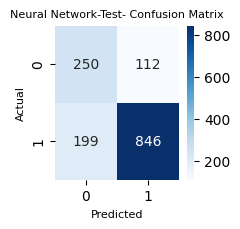

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred_labels)
# Plot confusion matrix for test data
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 10})
plt.title('Neural Network-Test- Confusion Matrix',fontsize=8)
plt.xlabel('Predicted',fontsize=8)
plt.ylabel('Actual',fontsize=8)
plt.show()

44/44 [==============================] - 1s 11ms/step
[0.98448443 0.5184506  0.9849564  ... 0.98916596 0.62575924 0.86320513]


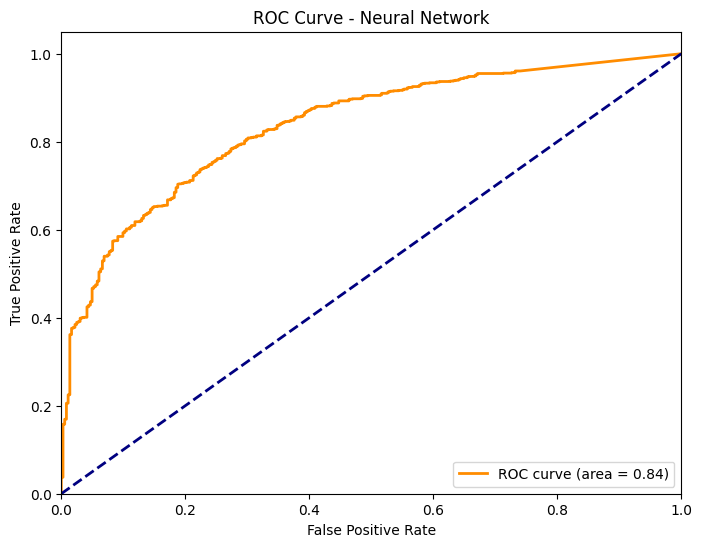

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your model is named 'model' and has been trained
# Assuming X_test_scaled is your scaled test data and y_test is your true labels

# Predict probabilities for the positive class
y_test_pred_prob = model.predict(X_test_scaled).ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
print(y_test_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")
plt.show()